# Titanic Dataset 
![Titanic](shutterstock_1837038775-1-1024x671.jpg)

## Exploratory Analysis and Survival Predicition using Logistic Regression

Importing required Libraries

In [102]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

cf.go_offline()
%matplotlib inline 
sns.set_style("whitegrid")

Importing, Reading and analysing the data

In [104]:
train = pd.read_csv("titanic_train.csv")

In [105]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Visualization and Inferences

<AxesSubplot: xlabel='Survived', ylabel='count'>

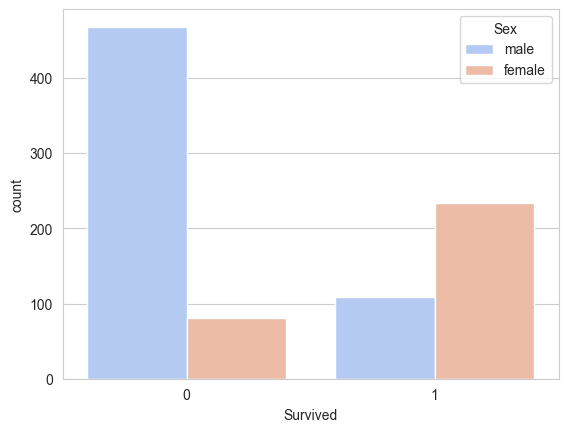

In [108]:
sns.countplot(x = "Survived", data = train, hue = "Sex", palette = "coolwarm")

<AxesSubplot: xlabel='Survived', ylabel='count'>

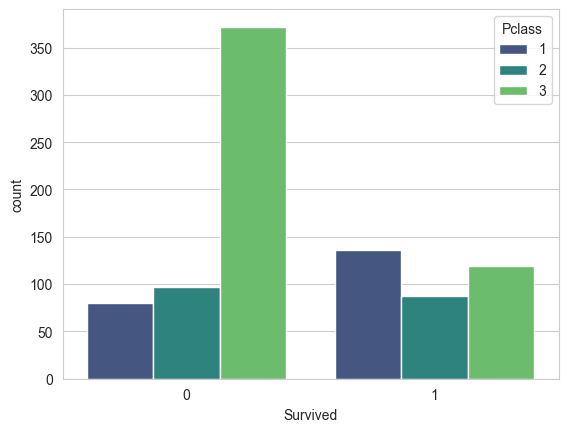

In [16]:
sns.countplot(x = "Survived", data = train, hue = "Pclass", palette = "viridis")

The general trend that is seen to be followed from the above count plot is that most of the deceased passengers
where mostly male, and majority of surviving passengers were female.

Below:
Similar inference can be made for the Pclass(Passenger Class) column, most surviving passenger were from 1 or the 2 
class

<AxesSubplot: xlabel='Age'>

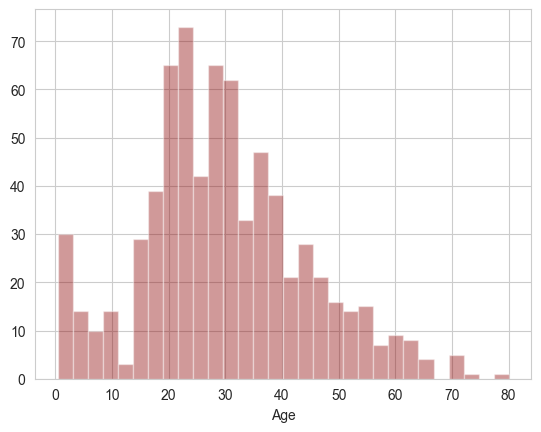

In [26]:
sns.distplot(train["Age"].dropna(), kde = False, color = "darkred", bins = 30)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

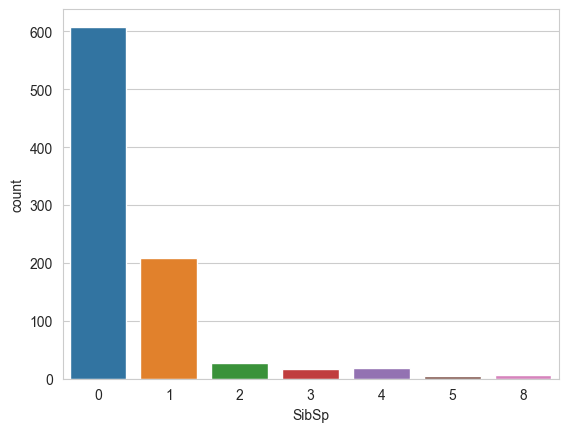

In [27]:
sns.countplot(x = "SibSp", data = train)

In [37]:
train["Fare"].iplot(kind = "hist", color = "lightblue", bins = 40)

## Missing Data and Data Cleaning

<AxesSubplot: >

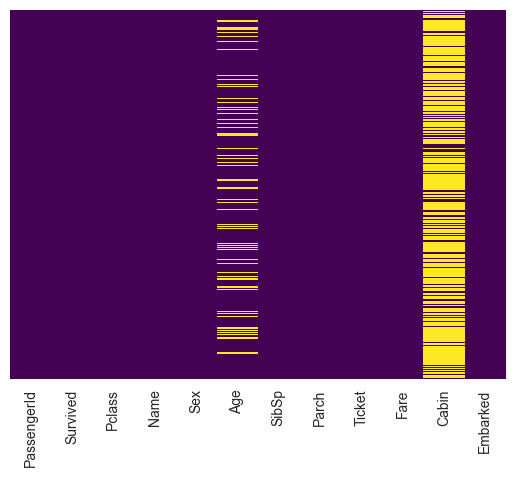

In [21]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

It is clear from the above heatmap that the Cabin column has a majority of its data missing. The Age columns also
has around 20% of its data missing

Since not a lot of data is missing from the age column, data can be imputed in it, one way of doing this is imputing average
age of all the passengers into the missing places.
But a better approach to tackle this problem is to impute the average age by passenger class.

This is better illustrated through the box plot below. 

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

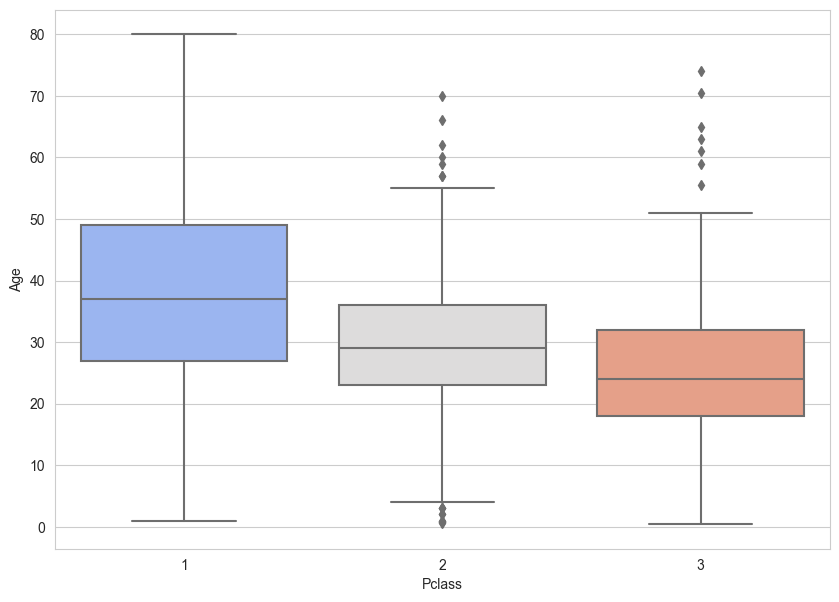

In [110]:
plt.figure(figsize = (10,7))

sns.boxplot(x = "Pclass", y = "Age", data = train, palette = "coolwarm")b

Average age of 1st class passenger seems to be more as compared to the 3 and 2 class passenger which seems ok.

The Below function will impute suitable age in the missing places.

In [114]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

<AxesSubplot: >

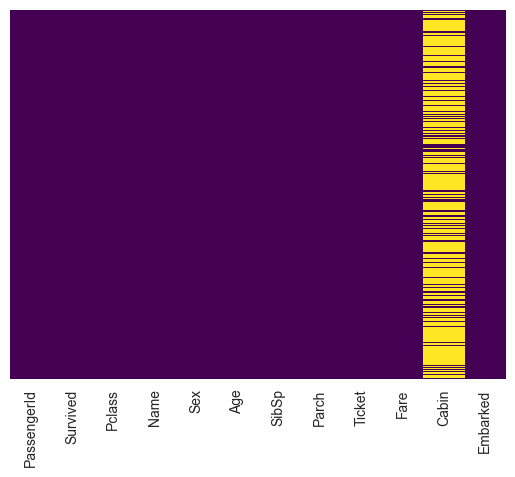

In [113]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis = 1)

sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

* Now that there is no more missing data in the Age column, we can move to the other column that is Cabin,
Since a lot of data is missing from this column it will be okay to just drop this columns out of the 
dataset.

In [ ]:
train.drop("Cabin", axis = 1, inplace = True)

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Dummy Variables

We need to now introduce dummy values in form of integers in place of Categorical Values i.e.
Sex, Embarked.

In [116]:
sex = pd.get_dummies(train["Sex"], drop_first = True)
embarked = pd.get_dummies(train["Embarked"], drop_first = True)

In [72]:
train.drop(["Sex", "Embarked", "Ticket", "Name"], axis = 1, inplace = True)

In [73]:
train = pd.concat((train, sex, embarked), axis = 1)

In [74]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24.0,1,0,7.2500,1,0,1
1,2,1,1,37.0,1,0,71.2833,0,0,0
2,3,1,3,24.0,0,0,7.9250,0,0,1
3,4,1,1,37.0,1,0,53.1000,0,0,1
4,5,0,3,24.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,29.0,0,0,13.0000,1,0,1
887,888,1,1,37.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,37.0,0,0,30.0000,1,0,0


## Logistic Regression Model

### Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(train.drop("Survived", axis = 1), train["Survived"], test_size = 0.4, random_state = 101)

### Training and Predicting

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression()

In [97]:
predictions = logReg.predict(X_test)

### Model Evaluation

In [98]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       207
           1       0.83      0.66      0.74       150

    accuracy                           0.80       357
   macro avg       0.81      0.78      0.79       357
weighted avg       0.81      0.80      0.80       357

